## Scipy : high-level scientific computing

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

#### Special functions: `scipy.special`

In [4]:
from scipy import special

In [8]:
special.gamma(4+1)

24.0

In [13]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

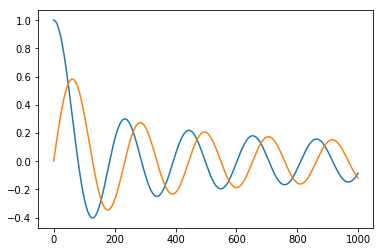

In [18]:
plt.plot(special.j0(np.linspace(0,30,1000)))
plt.plot(special.j1(np.linspace(0,30,1000)))

#### Linear algebra operations: `scipy.linalg`

In [19]:
from scipy import linalg

In [20]:
mat = np.asarray([[1,2],[3,4]])

In [21]:
linalg.det(mat)

-2.0

In [22]:
linalg.eigvals(mat)

array([-0.37228132+0.j,  5.37228132+0.j])

In [25]:
linalg.eig(mat)

(array([-0.37228132+0.j,  5.37228132+0.j]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

In [23]:
linalg.inv(mat)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [24]:
np.dot(linalg.inv(mat),mat)

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

#### Interpolation: `scipy.interpolate`

In [26]:
from scipy import interpolate

In [48]:
time = np.linspace(0,2*np.pi,10)
sin  = np.sin(time)+0.1*np.random.randn(10)

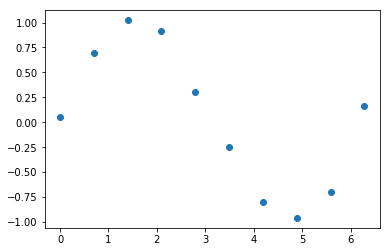

In [52]:
plt.plot(time,sin,'o')

In [55]:
inter_sin = interpolate.interp1d(time,sin)

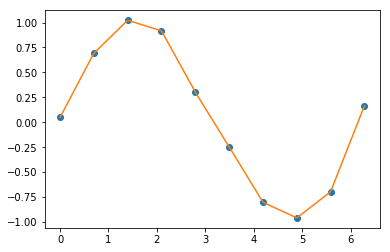

In [69]:
plt.plot(time,sin,'o')
plt.plot(np.linspace(0,2*np.pi,200),
         inter_sin(np.linspace(0,2*np.pi,200)))

In [70]:
inter3_sin = interpolate.interp1d(time,sin,kind='cubic')

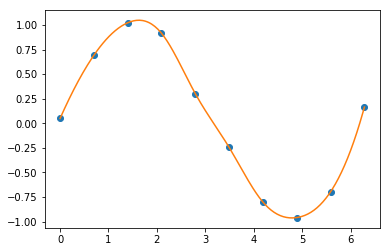

In [71]:
plt.plot(time,sin,'o')
plt.plot(np.linspace(0,2*np.pi,200),
         inter3_sin(np.linspace(0,2*np.pi,200)))

#### Optimization and fit: `scipy.optimize`

In [72]:
from scipy import optimize

In [162]:
time = np.linspace(0,np.pi,50)
sin  = 5.5*np.sin(3*time)+np.random.randn(50)

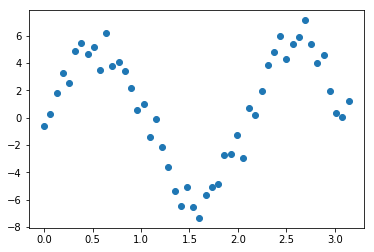

In [163]:
plt.plot(time,sin,'o')

In [164]:
def sin_func(t, a, omega):
    return(a*np.sin(omega*t))

In [181]:
p, pcov = optimize.curve_fit(f=sin_func,xdata=time,ydata=sin,p0=[0,2.5],method='lm')

In [182]:
perr = np.sqrt(np.diag(pcov))

In [183]:
perr

array([0.19413995, 0.01822222])

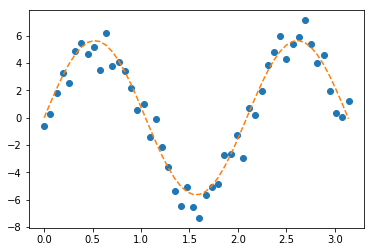

In [184]:
plt.plot(time,sin,'o')
plt.plot(time,sin_func(time,*p),'--')

#### Finding the minimum of a scalar function

In [194]:
def f(x):
    return(x**2 + 10*np.sin(x))

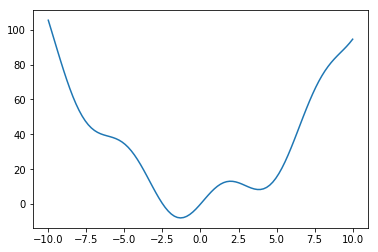

In [186]:
plt.plot(np.linspace(-10,10,100),f(np.linspace(-10,10,100)))

In [188]:
optimize.minimize(f, x0=5)

      fun: 8.31558557947746
 hess_inv: array([[0.11879022]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([3.83746713])

In [189]:
optimize.minimize(f, x0=-7)

      fun: -7.945823375615279
 hess_inv: array([[0.08576577]])
      jac: array([-2.98023224e-07])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 5
     njev: 11
   status: 0
  success: True
        x: array([-1.30644003])

#### Finding the roots of a scalar function

In [200]:
optimize.root(f,-5,method='lm')

   cov_x: array([[0.01]])
    fjac: array([[-10.00000001]])
     fun: array([0.])
    ipvt: array([1], dtype=int32)
 message: 'The cosine of the angle between func(x) and any column of the\n  Jacobian is at most 0.000000 in absolute value'
    nfev: 64
     qtf: array([0.])
  status: 4
 success: True
       x: array([0.])

#### Numerical integration: `scipy.integrate`

In [201]:
from scipy import integrate

In [202]:
integrate.quad(np.sin,0,2*np.pi)

(2.221501482512777e-16, 4.3998892617845996e-14)

#### Integrating differential equations

In [203]:
def diff_exp(y,t):
    return(2*y)

In [205]:
t = np.linspace(0, 4, 40)
y = integrate.odeint(diff_exp,y0=1,t=t)

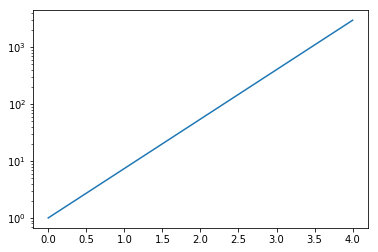

In [209]:
plt.semilogy(t,y)

In [219]:
def diff_j0(y,t):
    return(2*scipy.special.j0(y))

In [222]:
t = np.linspace(0, 10, 100)
y = integrate.odeint(diff_j0,y0=1,t=t)

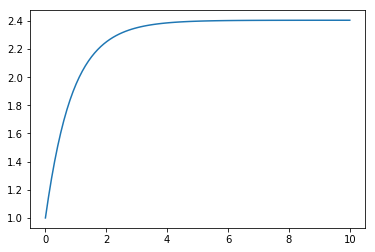

In [223]:
plt.plot(t,y)

In [226]:
def diff_osc(ys,t):
    return(ys[1],-4*ys[0])

In [227]:
t = np.linspace(0, 10, 100)
ys = integrate.odeint(diff_osc,y0=(0,1),t=t)

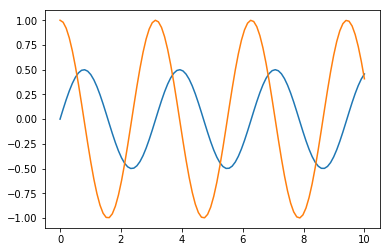

In [232]:
plt.plot(t,ys.T[0])
plt.plot(t,ys.T[1])

In [238]:
def diff_osc_d(ys,t):
    return(ys[1],-4*ys[0]-0.5*ys[1])

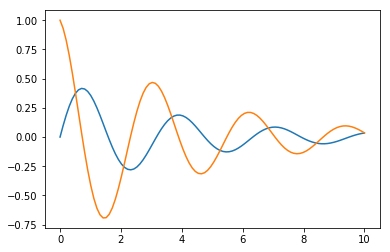

In [239]:
t = np.linspace(0, 10, 100)
ys = integrate.odeint(diff_osc_d,y0=(0,1),t=t)
plt.plot(t,ys.T[0])
plt.plot(t,ys.T[1])